<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/api_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing = fetch_california_housing()
print(housing.keys(), type(housing))

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']) <class 'sklearn.utils._bunch.Bunch'>


Separando os dados em treino, teste e validação.

In [58]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Escalonando as dados

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

#Treinando o model
##1. Usando a Api funcional do keras

In [45]:
from keras.api._v2.keras import activations
input_ = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Dense(30, activation='relu')(input_)
layer2 = keras.layers.Dense(30, activation='relu')(layer1)
concat = keras.layers.Concatenate()([input_, layer2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_6[0][0]']            

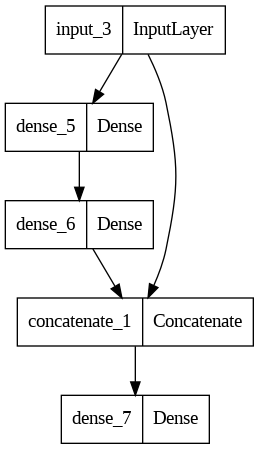

In [48]:
img = keras.utils.plot_model(model)
img

##2. Usando a Api com arquitetura com várias entradas e várias saídas.

In [61]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1= keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

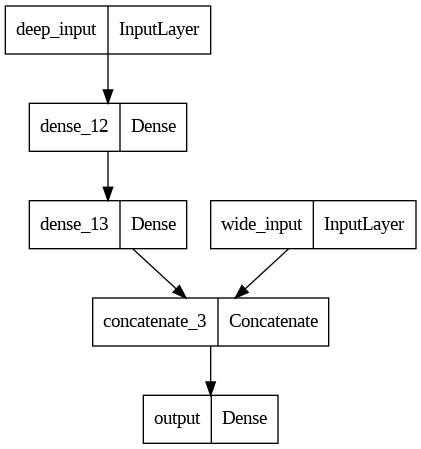

In [62]:
keras.utils.plot_model(model)

In [74]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [64]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:,:5], X_val[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]

In [65]:
X_new_A, X_new_B = X_test[:3], X_test[:3]

In [75]:
history = model.fit(
    (X_train_A, X_train_B), y_train, epochs=20,
    validation_data=( (X_val_A, X_val_B), y_val)
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.3261 - accuracy: 0.0030 - val_loss: 0.5230 - val_accuracy: 0.0031
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.0030 - val_loss: 0.5180 - val_accuracy: 0.0031
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3231 - accuracy: 0.0030 - val_loss: 0.5458 - val_accuracy: 0.0031
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.0030 - val_loss: 0.5258 - val_accuracy: 0.0031
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.0030 - val_loss: 0.5152 - val_accuracy: 0.0031
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.0030 - val_loss: 0.4985 - val_accuracy: 0.0031
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.0030 - val_loss: 0.5080 - val_accuracy: 0.0031
Epoch 

In [76]:
curves = pd.DataFrame(history.history)

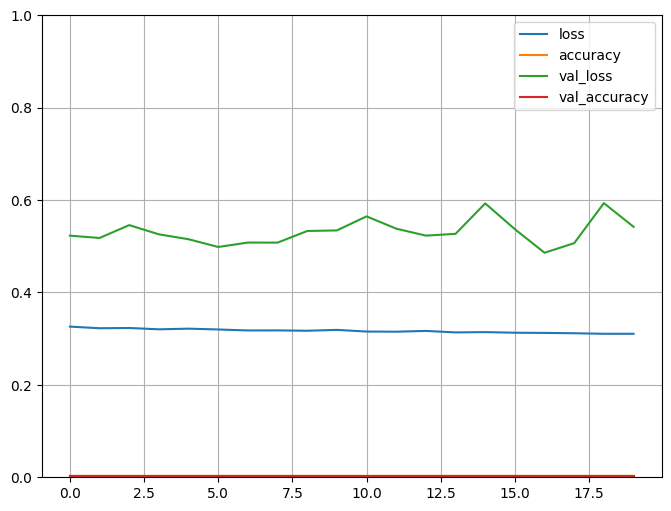

In [77]:
curves.plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [78]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3720 - accuracy: 0.0027


[0.3720352053642273, 0.0027131782844662666]

In [79]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1= keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])